# Estudio de funciones Python, SQL y PowerBI / Dashboard de Box Office Mojo

Este proyecto lo hice con el fin de estudiar algunas funciones, sentencias y conceptos de Python, SQL y PowerBI. Se analiza los datos obtenidos de Box Office Mojo, el cual es un sitio web dedicado al seguimiento y conteo de los ingresos de las películas, luego se realiza un Dashboard en PowerBI.

## Importación de datos a través de Pandas

Se importan los datos utilizando la función read_csv de Pandas

In [1]:
import pandas as pd

mojoBrandIndices = pd.read_csv('C:/Users/Bryan/Documents/Portafolio/Mojo-Movies/boxofficemojobrandindices.tsv', sep='\\t', engine='python')
mojoTopGenres = pd.read_csv('C:/Users/Bryan/Documents/Portafolio/Mojo-Movies/boxofficemojotopgenres.tsv', sep='\\t', engine='python')
mojoTopFranchises = pd.read_csv('C:/Users/Bryan/Documents/Portafolio/Mojo-Movies/boxofficemojotopfranchises.tsv', sep='\\t', engine='python')
mojoTopInternational = pd.read_csv('C:/Users/Bryan/Documents/Portafolio/Mojo-Movies/boxofficemojointernationaltop1000.tsv', sep='\\t', engine='python', names=['Rank', 'Title', 'Worldwide_Lifetime_Gross', 'Domestic_Lifetime_Gross', 'Domestic', 'Foreign_Lifetime_Gross', 'Foreign', 'Year'], header=0)

## Exploración de datos a través de SQL

Se realiza una exploración para entender los datos que tenemos, encontrar relaciones entre las tablas y ver qué tablas se deben modificar.

In [2]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

pysqldf("SELECT * FROM mojoBrandIndices ORDER BY [Total] DESC")

,Brand,Total,Releases,#1 Release,Lifetime Gross
0,Marvel Comics,15806336901,69,Avengers: Endgame,858373000
1,Legendary Pictures,7018798067,56,Jurassic World,652270625
2,Lucasfilm,6325022918,39,Star Wars: Episode VII - The Force Awakens,936662225
3,Pixar,6078217662,28,Incredibles 2,608581744
4,DC Comics,5815645953,46,The Dark Knight,533345358
5,DreamWorks Animation,5792217737,41,Shrek 2,441226247
6,Vertigo Entertainment,3154664176,41,It,327481748
7,Bad Robot,3077078931,15,Star Wars: Episode VII - The Force Awakens,936662225
8,Walt Disney Animation Studios,2774912904,15,Frozen II,477373578
9,Illumination Entertainment,2759505881,13,The Secret Life of Pets,368384330


In [3]:
pysqldf("SELECT * FROM mojoTopGenres ORDER BY [Total] DESC, [Lifetime Gross] DESC")

,Genre,Total,Titles,#1 Title,Lifetime Gross
0,Adaptation,72848144854,963,Avengers: Endgame,858373000
1,Adventure,68146286235,877,Star Wars: Episode VII - The Force Awakens,936662225
2,Supernatural,60041261115,750,Star Wars: Episode VII - The Force Awakens,936662225
3,IMAX,56249895595,372,Star Wars: Episode VII - The Force Awakens,936662225
4,3D,50745498053,394,Star Wars: Episode VII - The Force Awakens,936662225
...,...,...,...,...,...
240,Golf,203990530,12,Tin Cup,53854588
241,Soccer,188487876,25,Kicking & Screaming,52842724
242,Brainwashing,155496404,5,The Manchurian Candidate,65955630
243,Anthology,146953739,36,Twilight Zone: The Movie,29450919


In [4]:
pysqldf("SELECT * FROM mojoTopFranchises ORDER BY [Total] DESC, [Lifetime Gross] DESC")

,Franchise,Total,Releases,#1 Release,Lifetime Gross
0,Marvel Cinematic Universe,9892046843,30,Avengers: Endgame,858373000
1,Star Wars,5081703177,21,Star Wars: Episode VII - The Force Awakens,936662225
2,Disney Live Action Reimaginings,3493794115,17,The Lion King,543638043
3,Spider-Man,3269168524,10,Spider-Man: No Way Home,772170405
4,J.K. Rowling's Wizarding World,2787740350,27,Harry Potter and the Deathly Hallows: Part 2,381011219
...,...,...,...,...,...
287,Ip Man Franchise,2922996,3,Ip Man 3,2679437
288,Chal Mera Putt,1089000,2,Chal Mera Putt 3,644000
289,Shiloh,1066768,2,Shiloh,1007822
290,Evangelion,416382,3,Evangelion: 3.0 You Can (Not) Redo,174945


In [5]:
pysqldf("SELECT * FROM mojoTopInternational ORDER BY Rank ASC")

,Rank,Title,Worldwide_Lifetime_Gross,Domestic_Lifetime_Gross,Domestic,Foreign_Lifetime_Gross,Foreign,Year
0,1,Avatar,2847246203,760507625,0.27,2086738578,0.73,2009
1,2,Avengers: Endgame,2797501328,858373000,0.31,1939128328,0.69,2019
2,3,Titanic,2201647264,659363944,0.30,1542283320,0.70,1997
3,4,Star Wars: Episode VII 0 The Force Awakens,2069521700,936662225,0.45,1132859475,0.55,2015
4,5,Avengers: Infinity War,2048359754,678815482,0.33,1369544272,0.67,2018
...,...,...,...,...,...,...,...,...
995,996,Evan Almighty,174440724,100462298,0.58,73978426,0.42,2007
996,997,Amélie,174118254,33225499,0.19,140892755,0.81,2001
997,998,Identity Thief,173965010,134506920,0.77,39458090,0.23,2013
998,999,The Nutcracker and the Four Realms,173961069,54858851,0.32,119102218,0.68,2018


### SELECT

- SELECT DISTINCT: Muestra solo los resultados únicos en una columna de datos
- SELECT DISTINCT ON: Se utiliza en PostgreSQL para obtener los resultados únicos luego de ser ordenados
- SELECT TOP: Obtiene X cantidad de los primeros resultados
- SELECT INTO: Copia los datos de una tabla en una nueva tabla

In [6]:
pysqldf("SELECT DISTINCT [#1 Title] [#1 Title], [Lifetime Gross] FROM mojoTopGenres ORDER BY [Lifetime Gross] DESC")

,#1 Title,Lifetime Gross
0,Star Wars: Episode VII - The Force Awakens,936662225
1,Avengers: Endgame,858373000
2,Avatar,760507625
3,Black Panther,700426566
4,Titanic,659363944
...,...,...
127,Eddie Murphy: Raw,50504655
128,Cop Land,44862187
129,About Last Night,38702310
130,Twilight Zone: The Movie,29450919


DISTINCT para obtener todas las películas únicas dentro de mojoTopGenres

### Funciones de agregación

Más utilizadas: 
- AVG
- COUNT
- MAX
- MIN
- SUM

In [7]:
pysqldf("SELECT COUNT(Genre) AS [Genres], [#1 Title], AVG([Lifetime Gross]) AS [Average Lifetime Gross] FROM mojoTopGenres GROUP BY [#1 Title] ORDER BY [Average Lifetime Gross] DESC, [Genres] DESC")

,Genres,#1 Title,Average Lifetime Gross
0,5,Star Wars: Episode VII - The Force Awakens,936662225.0
1,8,Avengers: Endgame,858373000.0
2,4,Avatar,760507625.0
3,1,Black Panther,700426566.0
4,1,Titanic,659363944.0
...,...,...,...
127,2,Eddie Murphy: Raw,50504655.0
128,1,Cop Land,44862187.0
129,1,About Last Night,38702310.0
130,1,Twilight Zone: The Movie,29450919.0


Recuento utilizando COUNT en Genre y AVG en Lifetime Gross para saber cuantos géneros abarcan las películas con más ventas

### Sentencias de JOIN

- INNER JOIN: Resultados dentro de ambas tablas
- LEFT JOIN: Resultados dentro de la primera tabla
- RIGHT JOIN: Resultados dentro de la segunda tabla
- FULL JOIN: Resultados de ambas tablas

(También puede hacerse un LEFT, RIGHT o FULL JOIN excluyendo INNER JOIN)

In [8]:
pysqldf("SELECT mojoBrandIndices.Brand, mojoTopFranchises.Franchise, mojoBrandIndices.[#1 Release], mojoBrandIndices.[Lifetime Gross] FROM mojoBrandIndices INNER JOIN mojoTopFranchises ON mojoBrandIndices.[#1 Release] = mojoTopFranchises.[#1 Release] ORDER BY mojoBrandIndices.[Lifetime Gross] DESC")

,Brand,Franchise,#1 Release,Lifetime Gross
0,Lucasfilm,Star Wars,Star Wars: Episode VII - The Force Awakens,936662225
1,Bad Robot,Star Wars,Star Wars: Episode VII - The Force Awakens,936662225
2,Marvel Comics,Avengers,Avengers: Endgame,858373000
3,Marvel Comics,Marvel Cinematic Universe,Avengers: Endgame,858373000
4,Legendary Pictures,Jurassic Park,Jurassic World,652270625
5,Pixar,The Incredibles,Incredibles 2,608581744
6,DC Comics,Batman,The Dark Knight,533345358
7,DC Comics,The Dark Knight Trilogy,The Dark Knight,533345358
8,Walt Disney Animation Studios,Frozen,Frozen II,477373578
9,DreamWorks Animation,Shrek,Shrek 2,441226247


INNER JOIN utilizando las peliculas con más ventas para unir las marcas con su franquicia específica.

### Filtros de texto
Para filtrar datos utilizando texto, se puede utilizar:
- WHERE ... LIKE "%ejemplo%"
- WHERE ... SIMILAR TO ...
- WHERE ... ~ ... (Este solo se puede utilizar en POSIX, POSTGRESQL)

El carácter % se utiliza para representar cualquier carácter antes, durante o después de un texto, por ejemplo "a%" quiere decir a y cualquier otros carácteres.
El carácter _ se utiliza para representar cualquier carácter, pero abarcando solo un espacio, por ejemplo "a_" quiere decir a y cualquier otro carácter.

In [9]:
pysqldf("SELECT Title, Year, [Worldwide_Lifetime_Gross] FROM mojoTopInternational WHERE Title LIKE '%God%'")

,Title,Year,Worldwide_Lifetime_Gross
0,Godzilla,2014,524976069
1,Godzilla vs Kong,2021,468216094
2,Godzilla: King of the Monsters,2019,386600138
3,Godzilla,1998,379014294
4,Exodus: Gods and Kings,2014,268175631
5,The Godfather,1972,246120986


WHERE y LIKE para obtener todas las películas que contienen la palabra "God"

### Ejemplo utilizando WHERE, GROUP BY, HAVING y ORDER BY

WHERE se utiliza para filtrar resultados antes de un GROUP BY
HAVING se utiliza para filtrar resultados luego de un GROUP BY

In [10]:
pysqldf("SELECT Title, [Year], SUM([Worldwide_Lifetime_Gross]) FROM mojoTopInternational WHERE Title LIKE '%God%' GROUP BY [Year] HAVING SUM([Worldwide_Lifetime_Gross]) > 400000000 ORDER BY [Year] ASC")

,Title,Year,SUM([Worldwide_Lifetime_Gross])
0,Godzilla,2014,793151700
1,Godzilla vs Kong,2021,468216094


WHERE y LIKE para obtener todas las películas que contienen la palabra "God" y luego de ordenar por Año, se usa HAVING para obtener solo las películas que superan los 400 millones de ingresos.

## Exploración de los datos a través de Pandas

In [11]:
mojoTopGenres.describe()

,Total,Titles,Lifetime Gross
count,2.450000e+02,245.000000,2.450000e+02
mean,4.268522e+09,98.673469,2.887223e+08
std,9.405073e+09,237.378233,2.063514e+08
min,1.534275e+07,1.000000,1.534275e+07
25%,8.661216e+08,24.000000,1.413402e+08
50%,1.841394e+09,40.000000,2.274711e+08
75%,3.345335e+09,81.000000,3.707829e+08
max,7.284814e+10,2499.000000,9.366622e+08


Estadísticas descriptivas de mojoTopGenres (solo columnas con números)

In [12]:
mojoTopGenres.describe(include=object)

,Genre,#1 Title
count,245,245
unique,243,132
top,Invasion,Avengers: Endgame
freq,2,8


Estadísticas descriptivas de mojoTopGenres, abarca solo las columnas con texto

### Valores Únicos

- pd.unique(): Obtiene los datos únicos de una columna
- df.groupby(): Agrupa los datos en un valor u objeto único
- df.drop_duplicates(): Elimina los datos repetidos en una columna

In [13]:
pd.unique(mojoTopGenres['#1 Title'])

array(['Star Wars: Episode VII - The Force Awakens', 'Avengers: Endgame',
       'Avatar', 'Black Panther', 'Titanic', 'Jurassic World',
       'Incredibles 2', 'The Lion King', 'Rogue One: A Star Wars Story',
       'Beauty and the Beast', 'Finding Dory',
       'Star Wars: Episode I - The Phantom Menace',
       'Avengers: Age of Ultron', 'The Hunger Games: Catching Fire',
       "Pirates of the Caribbean: Dead Man's Chest", 'Toy Story 3',
       'Wonder Woman', 'Iron Man 3',
       'Transformers: Revenge of the Fallen',
       'Harry Potter and the Deathly Hallows: Part 2', 'Finding Nemo',
       'The Lord of the Rings: The Return of the King',
       'The Passion of the Christ', 'Despicable Me 2', 'Deadpool',
       'Inside Out', 'Furious 7', 'Spider-Man: Homecoming',
       'Alice in Wonderland', 'Forrest Gump', 'Deadpool 2',
       "Harry Potter and the Sorcerer's Stone", 'Independence Day',
       'The Twilight Saga: Eclipse', 'Up', 'Inception', 'Home Alone',
       'The Matrix 

Muestra las películas únicas

In [14]:
mojoTopGenres.groupby("#1 Title").agg({ 'Titles': 'sum', 'Genre': ', '.join})

,Titles,Genre
#1 Title,,
A Few Good Men,49,"Play Adaptation, Courtroom Drama"
A League of Their Own,48,Baseball
About Last Night,30,Twentysomething Character
Air Force One,103,"Hostage, Terrorism"
Alice in Wonderland,41,Rodent
...,...,...
Wild Hogs,57,Road Trip
Wonder Woman,122,"Historical War, World War I"
World War Z,67,Zombie


Agrupa las películas en su valor único, suma el número de las películas repetidas y une los géneros, separándolos por ", "

In [15]:
mojoTopGenres.drop_duplicates(subset='#1 Title')

,Genre,Total,Titles,#1 Title,Lifetime Gross
0,Heroine,8513688318,82,Star Wars: Episode VII - The Force Awakens,936662225
5,Comic Book Adaptation,25665243979,181,Avengers: Endgame,858373000
13,Afflicted Character,1176713279,27,Avatar,760507625
17,Origin Story,8640390546,47,Black Panther,700426566
18,Disaster,4639641972,54,Titanic,659363944
...,...,...,...,...,...
239,Spoken Word Performance,254847429,25,Eddie Murphy: Raw,50504655
241,New Jersey,286409862,25,Cop Land,44862187
242,Twentysomething Character,273036581,30,About Last Night,38702310
243,Anthology,146953739,36,Twilight Zone: The Movie,29450919


Elimina todas las películas repetidas

### Filtros

- df[df["col"] == "filtro"]: Filtra los datos que son igual a la palabra especificada
- df[df["col"].str.contains("filtro")]: Filtra los datos que contienen la palabra especificada

In [16]:
mojoTopInternational[mojoTopInternational["Title"] == "Avatar"]

,Rank,Title,Worldwide_Lifetime_Gross,Domestic_Lifetime_Gross,Domestic,Foreign_Lifetime_Gross,Foreign,Year
0,1,Avatar,2847246203,760507625,0.27,2086738578,0.73,2009


Filtro de los datos por "Avatar"

In [17]:
mojoTopInternational[mojoTopInternational["Title"].str.contains('God', case=False)]

,Rank,Title,Worldwide_Lifetime_Gross,Domestic_Lifetime_Gross,Domestic,Foreign_Lifetime_Gross,Foreign,Year
207,208,Godzilla,524976069,200676069,0.38,324300000,0.62,2014
247,248,Godzilla vs Kong,468216094,100916094,0.22,367300000,0.78,2021
334,335,Godzilla: King of the Monsters,386600138,110500138,0.29,276100000,0.71,2019
345,346,Godzilla,379014294,136314294,0.36,242700000,0.64,1998
583,584,Exodus: Gods and Kings,268175631,65014513,0.24,203161118,0.76,2014
644,645,The Godfather,246120986,134966411,0.55,111154575,0.45,1972


Filtro de los datos que contienen "God"

### Join

pd.merge() = Une dos tablas utilizando datos de dos columnas
pd.join() = Une dos tablas utilizando datos del indíce
how: inner, left, right, outer

In [18]:
pd.merge(mojoBrandIndices, mojoTopFranchises, on='#1 Release', how='inner')

,Brand,Total_x,Releases_x,#1 Release,Lifetime Gross_x,Franchise,Total_y,Releases_y,Lifetime Gross_y
0,Marvel Comics,15806336901,69,Avengers: Endgame,858373000,Marvel Cinematic Universe,9892046843,30,858373000
1,Marvel Comics,15806336901,69,Avengers: Endgame,858373000,Avengers,2619552260,4,858373000
2,Legendary Pictures,7018798067,56,Jurassic World,652270625,Jurassic Park,1884578659,9,652270625
3,Lucasfilm,6325022918,39,Star Wars: Episode VII - The Force Awakens,936662225,Star Wars,5081703177,21,936662225
4,Pixar,6078217662,28,Incredibles 2,608581744,The Incredibles,870022836,2,608581744
5,DC Comics,5815645953,46,The Dark Knight,533345358,Batman,2411044358,18,533345358
6,DC Comics,5815645953,46,The Dark Knight,533345358,The Dark Knight Trilogy,1189849975,5,533345358
7,DreamWorks Animation,5792217737,41,Shrek 2,441226247,Shrek,1419608493,5,441226247
8,Vertigo Entertainment,3154664176,41,It,327481748,It,540422102,3,327481748
9,Bad Robot,3077078931,15,Star Wars: Episode VII - The Force Awakens,936662225,Star Wars,5081703177,21,936662225


Union de las tablas mojoBrandIndices y mojoTopFranchises utilizando los datos en común "#1 Release"

### Mutaciones

- df.rename(): Cambia el nombre de una o varias columnas o índices
- df.drop(): Elimina una o varias columnas o índices

In [19]:
mojoBrandIndices.rename(columns={"Brand": "Marca", "Total": "Ganancias Totales", "Releases": "Lanzamientos", "#1 Release": "Lanzamiento #1", "Lifetime Gross": "Ganancias Lanzamiento #1"})

,Marca,Ganancias Totales,Lanzamientos,Lanzamiento #1,Ganancias Lanzamiento #1
0,Marvel Comics,15806336901,69,Avengers: Endgame,858373000
1,Legendary Pictures,7018798067,56,Jurassic World,652270625
2,Lucasfilm,6325022918,39,Star Wars: Episode VII - The Force Awakens,936662225
3,Pixar,6078217662,28,Incredibles 2,608581744
4,DC Comics,5815645953,46,The Dark Knight,533345358
5,DreamWorks Animation,5792217737,41,Shrek 2,441226247
6,Vertigo Entertainment,3154664176,41,It,327481748
7,Bad Robot,3077078931,15,Star Wars: Episode VII - The Force Awakens,936662225
8,Walt Disney Animation Studios,2774912904,15,Frozen II,477373578
9,Illumination Entertainment,2759505881,13,The Secret Life of Pets,368384330


Cambio de nombre a las columnas "Brand", "Total", "Releases", ...

In [20]:
mojoBrandIndices.drop(range(0, 30), axis=0).drop(["Total"], axis=1)

,Brand,Releases,#1 Release,Lifetime Gross
30,Philip K. Dick,14,Minority Report,132072926
31,Dark Castle,16,Unknown,63686397
32,National Lampoon,21,National Lampoon's Animal House,120091123
33,Disney Channel,8,High School Musical 3: Senior Year,90559416
34,Roald Dahl,7,Charlie and the Chocolate Factory,206459076
35,Saturday Night Live,11,Wayne's World,121697323
36,DisneyToon Studios,8,Planes,90288712
37,Aardman,16,Chicken Run,106834564
38,Laika,6,Coraline,75286229
39,Alan Moore,4,Watchmen,107509799


Eliminación de los 30 primeros datos y de la columna "Total"

### Gráficos

Puede utilizarse Seaborn, Matplotlib u otra libreria para crear y personalizar gráficos, en este caso se usó Pyplot de Matplotlib

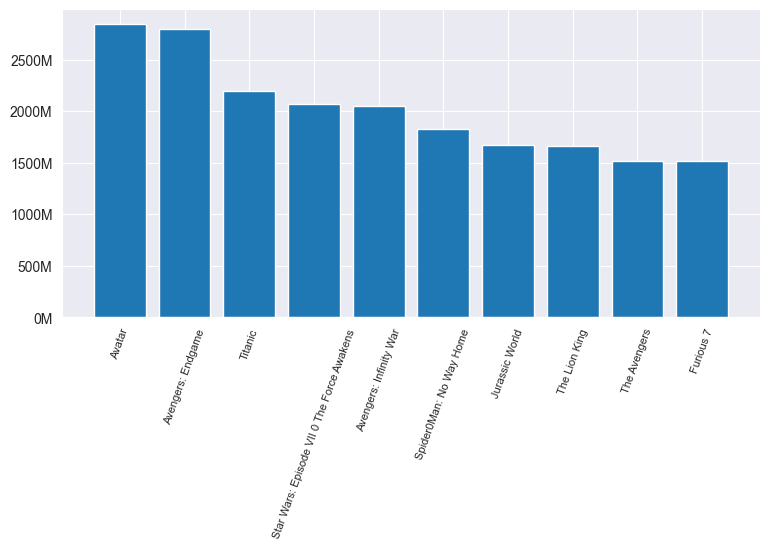

In [21]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    return "%1.0fM" % (x * 1e-6)

formatter = FuncFormatter(millions)

table = mojoTopInternational[["Title","Worldwide_Lifetime_Gross"]].head(10)

plt.subplots(figsize=[9,4])

plt.bar(table["Title"], table["Worldwide_Lifetime_Gross"])
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=70, fontsize=8)
plt.show()

Gráfico con las 10 películas con más ingreso bruto, usó de FuncFormatter para cambiar la notación científica a una más acorde y xticks para rotar el nombre de las películas

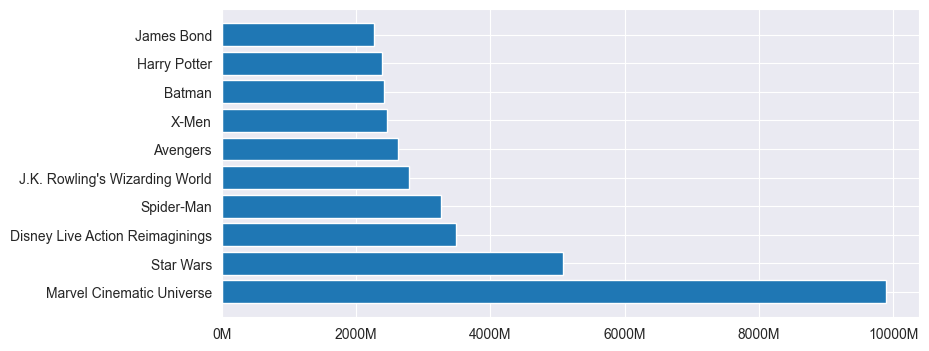

In [22]:
table = mojoTopFranchises[["Franchise","Total"]].head(10)

plt.subplots(figsize=[9,4])

plt.barh(table["Franchise"], table["Total"])
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

Gráfico con las 10 franquicias con mayores ingresos brutos en el mercado, también se utilizó FuncFormatter

## Exportación de las tablas a PowerBI

Luego de realizar la exploración, podemos entender que tablas, columnas o datos nos serán utiles para el Dashboard, por lo que modificaremos las tablas para luego exportarlas a la herramienta Power BI. Debido a que quiero que las tablas se complementen entre sí, quitaré los datos que no tengan relación con las otras tablas, por lo que es posible que la cantidad de datos se reduzca en una gran cantidad.

In [23]:
mojoTable = pd.merge(mojoTopFranchises[["Franchise", "#1 Release", "Lifetime Gross"]], mojoBrandIndices[["Brand", "#1 Release", "Releases", "Total"]], on='#1 Release', how='inner')
mojoTable.drop_duplicates(subset="Brand", keep="first", inplace=True)
mojoTable.drop_duplicates(subset="Franchise", keep="first", inplace=True)
mojoTable = mojoTable.sort_values("Total", ascending=False).reset_index(drop=True)

mojoTable

,Franchise,#1 Release,Lifetime Gross,Brand,Releases,Total
0,Marvel Cinematic Universe,Avengers: Endgame,858373000,Marvel Comics,69,15806336901
1,Jurassic Park,Jurassic World,652270625,Legendary Pictures,56,7018798067
2,Star Wars,Star Wars: Episode VII - The Force Awakens,936662225,Lucasfilm,39,6325022918
3,The Incredibles,Incredibles 2,608581744,Pixar,28,6078217662
4,Batman,The Dark Knight,533345358,DC Comics,46,5815645953
5,Shrek,Shrek 2,441226247,DreamWorks Animation,41,5792217737
6,It,It,327481748,Vertigo Entertainment,41,3154664176
7,Frozen,Frozen II,477373578,Walt Disney Animation Studios,15,2774912904
8,The Secret Life of Pets,The Secret Life of Pets,368384330,Illumination Entertainment,13,2759505881
9,Transformers,Transformers: Revenge of the Fallen,402111870,Hasbro,17,2079485824


Creación de la tabla mojoTable que contiene columnas de Brand, se eliminan datos duplicados y se ordena de forma descendiente en Total

In [24]:
newmojoTopGenres = mojoTopGenres[["Genre", "#1 Title", "Titles", "Total"]][mojoTopGenres["#1 Title"].isin(mojoTable["#1 Release"])]
newmojoTopGenres = newmojoTopGenres.sort_values("Total", ascending=False).reset_index(drop=True)

newmojoTopGenres

,Genre,#1 Title,Titles,Total
0,Adaptation,Avengers: Endgame,963,72848144854
1,Adventure,Star Wars: Episode VII - The Force Awakens,877,68146286235
2,Supernatural,Star Wars: Episode VII - The Force Awakens,750,60041261115
3,IMAX,Star Wars: Episode VII - The Force Awakens,372,56249895595
4,3D,Star Wars: Episode VII - The Force Awakens,394,50745498053
5,Animation,Incredibles 2,709,32031484157
6,Comic Book Adaptation,Avengers: Endgame,181,25665243979
7,Superhero,Avengers: Endgame,146,24227315180
8,CGI Animation,Incredibles 2,190,23828773930
9,Animal,Jurassic World,238,15273537631


Creación de la tabla newmojoTopGenres y se ordena por Total de forma descendiente

In [25]:
newmojoTopInternational = mojoTopInternational[["Title", "Year", "Domestic_Lifetime_Gross", "Foreign_Lifetime_Gross", "Worldwide_Lifetime_Gross"]][mojoTopInternational["Title"].isin(mojoTable["#1 Release"])]
newmojoTopInternational.drop_duplicates("Title", keep="first", inplace=True)

newmojoTopInternational

,Title,Year,Domestic_Lifetime_Gross,Foreign_Lifetime_Gross,Worldwide_Lifetime_Gross
1,Avengers: Endgame,2019,858373000,1939128328,2797501328
6,Jurassic World,2015,652385625,1018130819,1670516444
10,Frozen II,2019,477373578,972653355,1450026933
18,Incredibles 2,2018,608581744,634507500,1243089244
44,Alice in Wonderland,2010,334191110,691277106,1025468216
48,The Dark Knight,2008,534858444,471115201,1005973645
60,Shrek 2,2004,441226247,487534523,928760770
66,Ice Age 3: Dawn of the Dinosaurs,2009,196573705,690113112,886686817
71,The Secret Life of Pets,2016,368384330,507074301,875458631
81,Transformers: Revenge of the Fallen,2009,402111870,434191823,836303693


Creación de la tabla newmojoTopInternational y también se ordena por Total de forma descendiente

In [26]:
mojoTable.to_csv('C:/Users/Bryan/Documents/Portafolio/Mojo-Movies/boxofficeMojoTable.csv')
newmojoTopGenres.to_csv('C:/Users/Bryan/Documents/Portafolio/Mojo-Movies/boxofficeNewMojoGenres.csv')
newmojoTopInternational.to_csv('C:/Users/Bryan/Documents/Portafolio/Mojo-Movies/boxofficeNewMojoTopInternational.csv')

Finalmente, se exportan las tablas como CSVs, para luego ser utilizadas en PowerBI

## [Enlace a Dashboard (Imagen)](https://github.com/1bryanvalenzuela/Dashboard-Franquicias-MojoBox/blob/main/Dashboard.png)